In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

0

# A) Data Manipulation:

**a. Find the total number of male customers**

In [9]:
male_cust = sum(df['gender'] == 'Male')
male_cust

3549

**b. Find the total number of customers whose Internet Service is ‘DSL’**

In [10]:
dsl_cust = sum(df['InternetService'] == 'DSL')
dsl_cust

2416

**c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’**

In [11]:
new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No


**d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’**

In [12]:
new_customer = df[(df['tenure'] < 10) | df['TotalCharges'] < 500]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# B) Data Visualization:

**a. Build a pie-chart to show the distribution of customers would be churning out**

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
distribution_of_customers = df["Churn"].value_counts()
distribution_of_customers

Churn
No     5163
Yes    1869
Name: count, dtype: int64

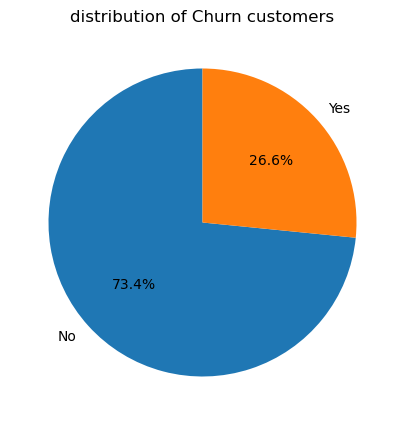

In [15]:
plt.figure(figsize = (5,5))
plt.pie(distribution_of_customers , labels=distribution_of_customers.index , startangle=90 , autopct='%1.1f%%')
plt.title('distribution of Churn customers')
plt.show()

**b. Build a bar-plot to show the distribution of ‘Internet Service’**

In [16]:
distribution_of_internetservice = df["InternetService"].value_counts()
distribution_of_internetservice

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

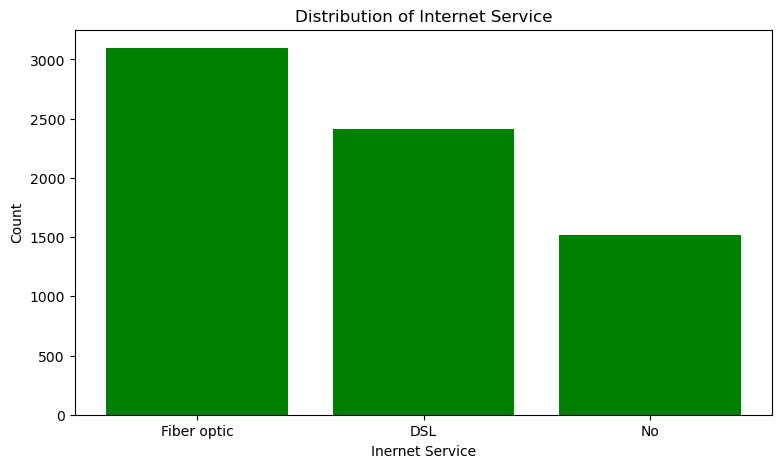

In [17]:
plt.figure(figsize = (9,5))
plt.bar(distribution_of_internetservice.index , distribution_of_internetservice.values, color = 'green')
plt.title('Distribution of Internet Service')
plt.xlabel('Inernet Service')
plt.ylabel('Count')
plt.show()

# C) Model Building:

**a. Build a sequential model using Keras, to find out if the customer would churn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:**
    
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

In [18]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [19]:
# Applying LabelEncoder and converting onto numeric.
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [20]:
# # Scaling relevant features.
scaler = MinMaxScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [21]:
# extracting the target and feature columns.
X = df[['tenure']]
y = df[['Churn']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Building Model.
model = Sequential([
    Dense(12, input_dim=1, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Training Model.
history = model.fit(X_train, y_train, epochs=150,validation_data=(X_test,y_test))

Epoch 1/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6709 - loss: 0.6635 - val_accuracy: 0.7342 - val_loss: 0.5710
Epoch 2/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 0.5535 - val_accuracy: 0.7342 - val_loss: 0.5278
Epoch 3/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.5251 - val_accuracy: 0.7342 - val_loss: 0.5172
Epoch 4/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 0.5212 - val_accuracy: 0.7342 - val_loss: 0.5125
Epoch 5/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.4969 - val_accuracy: 0.7342 - val_loss: 0.5106
Epoch 6/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7377 - loss: 0.5078 - val_accuracy: 0.7342 - val_loss: 0.5101
Epoch 7/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7414 - loss: 0.5113 - val_accuracy: 0.7342 - val_loss: 0.5099
Epoch 8/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7366 - loss: 0.5047 - val_accu

In [28]:
# Predicting Model.
# The output is an array of probabilities hence applied 0.5 as a threshold.
#1. If the probability is greater than 0.5, the model predicts class 1 (positive class).
#2. If the probability is less than or equal to 0.5, the model predicts class 0 (negative class). 
y_pred = model.predict(X_test)>0.5

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
cm = confusion_matrix(y_test, y_pred)

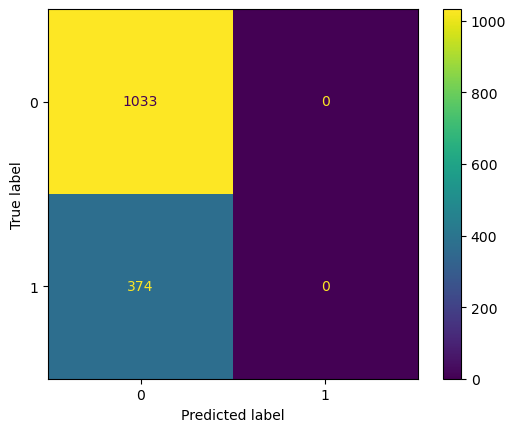

In [31]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

[]

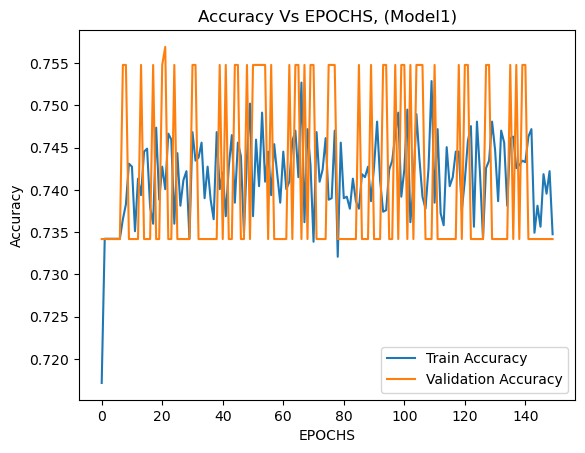

In [32]:
# Plotting Accuracy vs Epochs Graph
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Vs EPOCHS, (Model1)')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

In [55]:
np.mean(history.history['val_accuracy'])

0.7410708554585774

**b. Build the 2nd model using same target and feature variables:**
    
i. Add a drop-out layer after the input layer with drop-out value of 0.3

ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

iii. Predict the values on the test set and build a confusion matrix

iv. Plot the ‘Accuracy vs Epochs’ graph

In [33]:
# Drop-out value of 0.3 means that 70% of the nodes in the input layer will be dropped out.
# Drop-out value of 0.2 means that 80% of the nodes in the hidden layer will be dropped out.
model2 = Sequential([Dense(12, input_dim = 1, activation = 'relu'),
                    Dropout(0.3),
                    Dense(8, activation='relu'),
                    Dropout(0.2),
                    Dense(1, activation='sigmoid')])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model2.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])

In [35]:
history2 = model2.fit(X_train, y_train, epochs=150, verbose = 0, validation_split = 0.2)
history2

In [36]:
y_pred2 = model2.predict(X_test)>0.5

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[1033,    0],
       [ 374,    0]], dtype=int64)

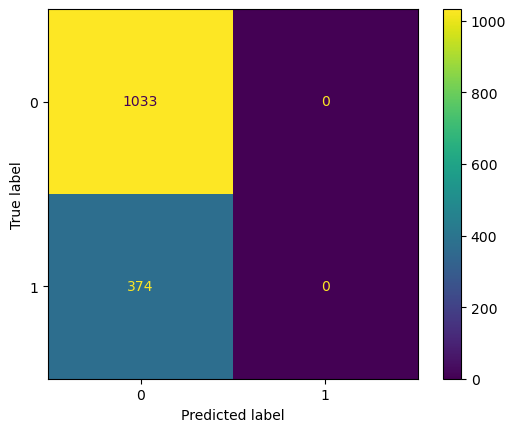

In [38]:
ConfusionMatrixDisplay(confusion_matrix=cm2).plot()

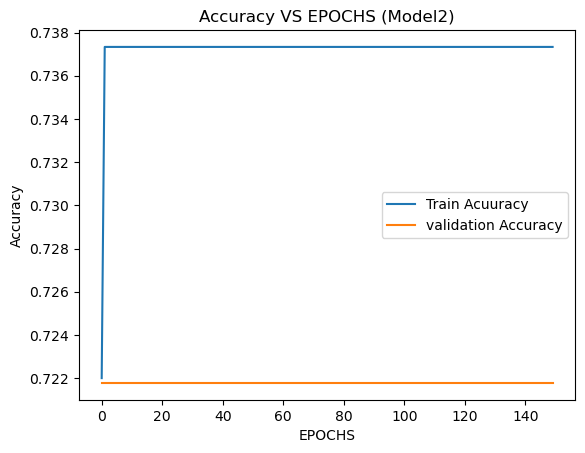

In [50]:
plt.plot(history2.history['accuracy'], label = 'Train Acuuracy')
plt.plot(history2.history['val_accuracy'], label = 'validation Accuracy')
plt.title('Accuracy VS EPOCHS (Model2)')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [54]:
np.mean(history2.history['val_accuracy'])

0.7217777967453003

**By looking at this graph, we can infer that the validation accuracy is constantly 73.41%.
Now, this tells us that something is wrong with our model.
The most probable explanation for this is the drop-out percentage is very high for the input
layer and the hidden layer and thus the model which we have built might be underfitting
the data.**

**c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:**
    
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

In [40]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model3 = Sequential([Dense(12, input_dim=3, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid')])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
history3 = model3.fit(X_train, y_train, epochs=150, verbose=0, validation_split=0.2)

In [45]:
y_pred3 = model3.predict(X_test)>0.5

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
cm3 = confusion_matrix(y_test, y_pred2)
cm3

array([[1033,    0],
       [ 374,    0]], dtype=int64)

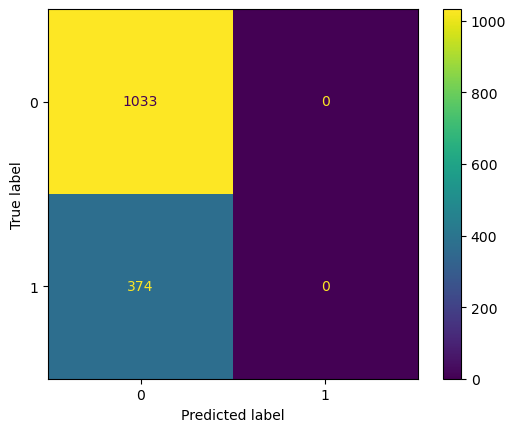

In [47]:
ConfusionMatrixDisplay(confusion_matrix=cm3).plot()

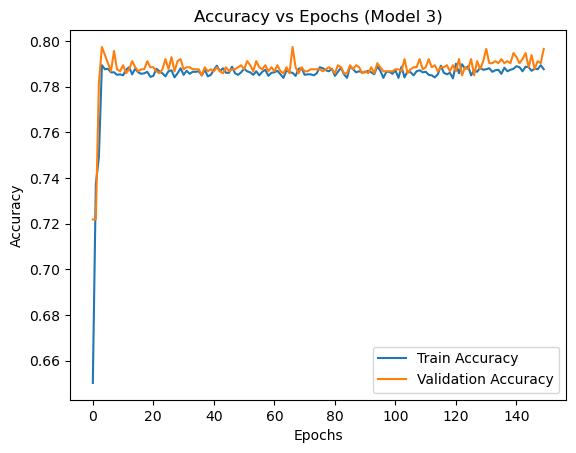

In [48]:
# Accuracy vs Epochs
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs (Model 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
average_val_accuracy = np.mean(history.history['val_accuracy'])
print(f"Average validation accuracy of 1st model: {average_val_accuracy}")

average_val_accuracy = np.mean(history2.history['val_accuracy'])
print(f"Average validation accuracy of 2nd model: {average_val_accuracy}")

average_val_accuracy = np.mean(history3.history['val_accuracy'])
print(f"Average validation accuracy of 3rd model: {average_val_accuracy}")

Average validation accuracy of 1st model: 0.7410708554585774
Average validation accuracy of 2nd model: 0.7217777967453003
Average validation accuracy of 3rd model: 0.7877866796652476
